## Important Libraries

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns 
import pickle 
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans,DBSCAN,AgglomerativeClustering
from sklearn.metrics import silhouette_score

## Read Data and Show it

In [2]:
data=pd.read_csv('CC GENERAL.csv')

In [3]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


## Show information of data and its description

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


## Data Cleansing 

In [6]:
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [7]:
data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].mean(),inplace=True)
data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].mean(),inplace=True)

C:\Users\Mahmoud\AppData\Local\Temp\ipykernel_9956\1564901692.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].mean(),inplace=True)
C:\Users\Mahmoud\AppData\Local\Temp\ipykernel_9956\1564901692.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beha

In [8]:
data.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [9]:
data.duplicated().sum()

0

## Data Analysis and Visualization

In [10]:
len(data.columns)

18

C:\Users\Mahmoud\AppData\Local\Temp\ipykernel_9956\1268668254.py:19: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(data=data,x=col,y='PAYMENTS',cmap='coolwarm')
C:\Users\Mahmoud\AppData\Local\Temp\ipykernel_9956\1268668254.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data,x='PAYMENTS',y=col,orient='h',palette='coolwarm')


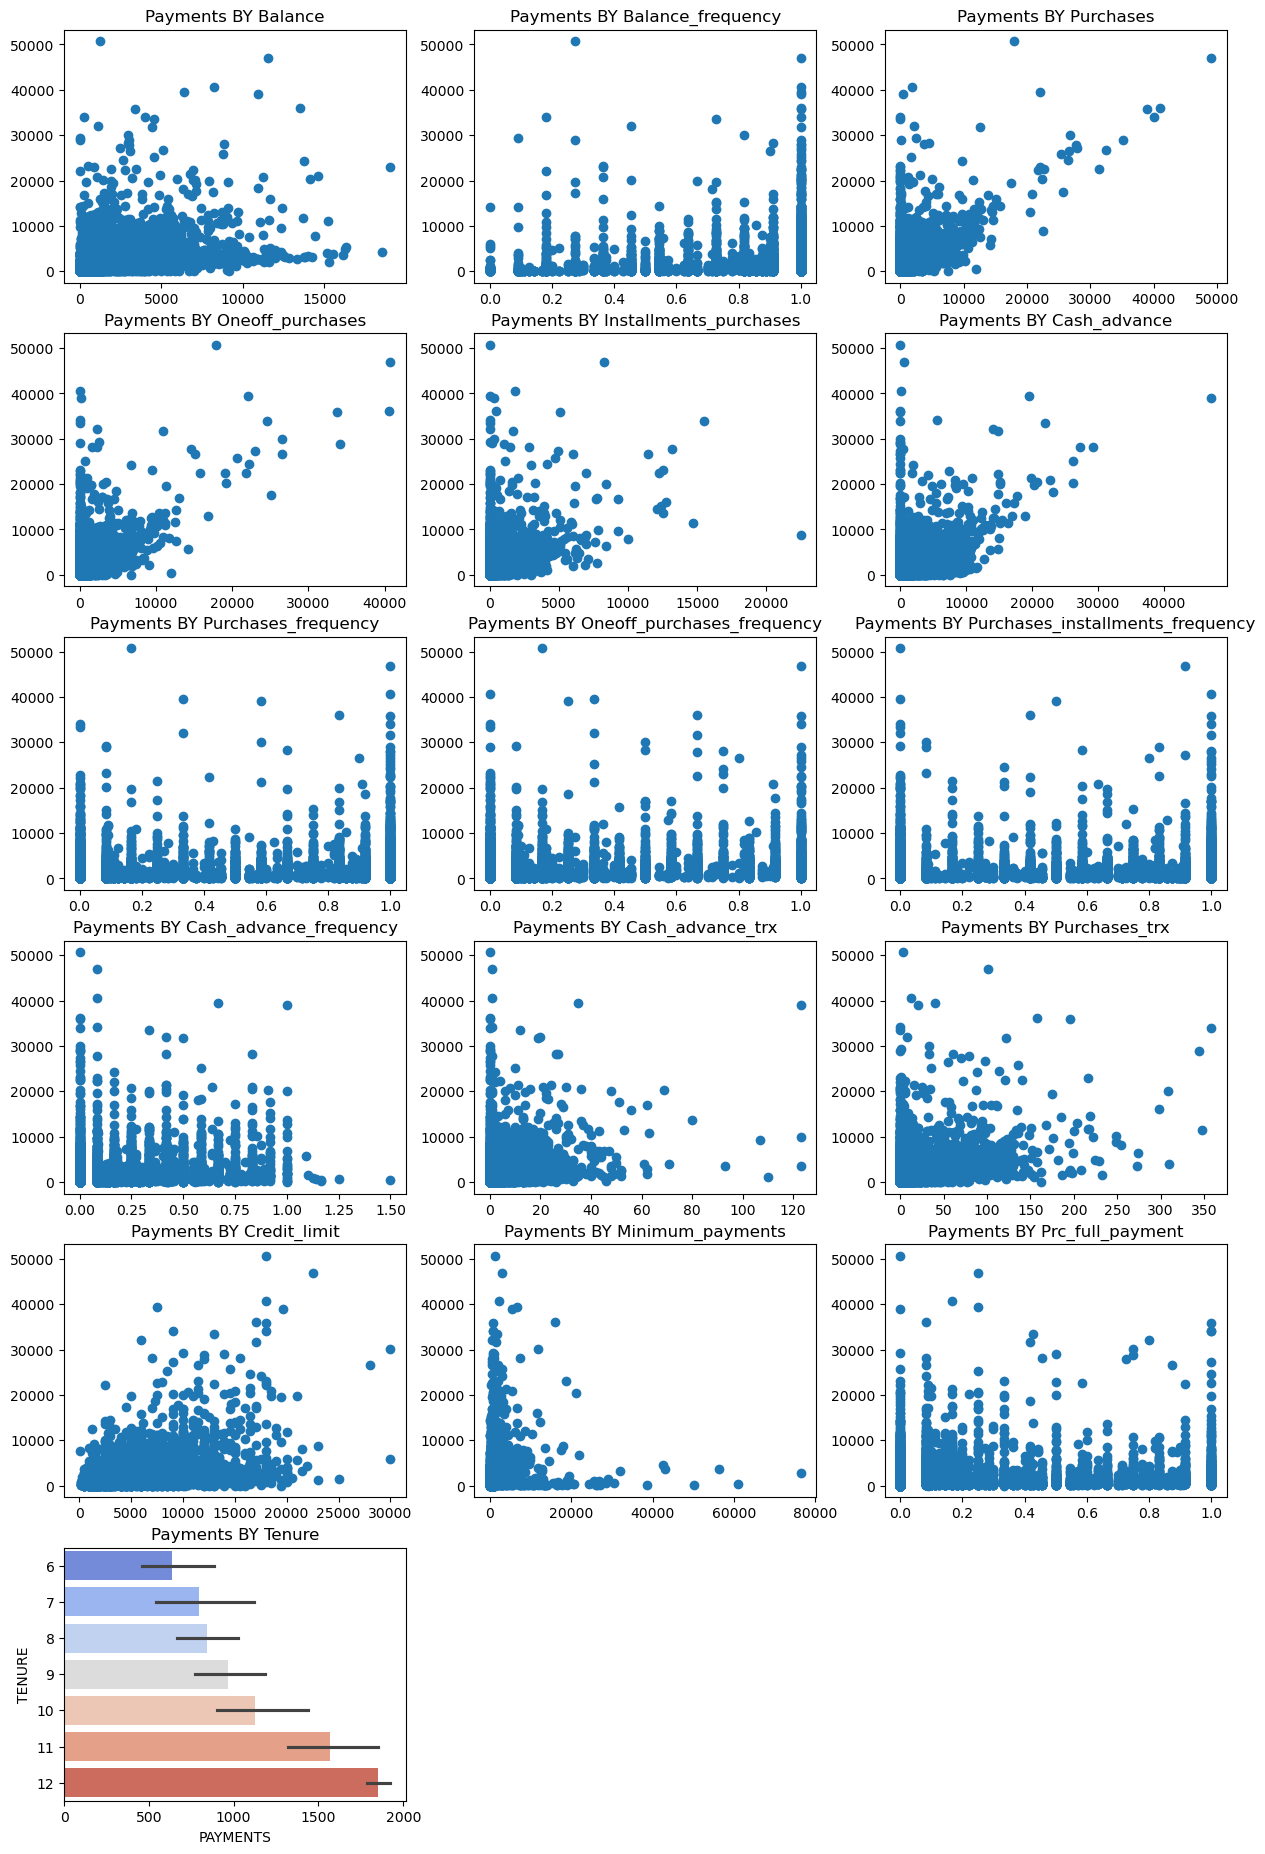

In [11]:
plt.figure(figsize=(15,23))
for col in data.columns[1:]:
    if data[col].nunique()<=10:
        if list(data.columns).index(col)<14:
            plt.subplot(6,3,list(data.columns).index(col))
        else:
            plt.subplot(6,3,list(data.columns).index(col)-1)    
        plt.title('Payments BY '+col.capitalize())
        sns.barplot(data=data,x='PAYMENTS',y=col,orient='h',palette='coolwarm')

    elif col=='PAYMENTS':
        continue
    else:
        if list(data.columns).index(col)<14:
            plt.subplot(6,3,list(data.columns).index(col))
        else:
            plt.subplot(6,3,list(data.columns).index(col)-1)   
        plt.title('Payments BY '+col.capitalize())
        plt.scatter(data=data,x=col,y='PAYMENTS',cmap='coolwarm')

plt.show()       

## Data Preprocessing 

In [12]:
data=data.iloc[:,1:]

C:\Users\Mahmoud\AppData\Local\Temp\ipykernel_9956\3411463947.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data,x=col,orient='h',palette='coolwarm')
C:\Users\Mahmoud\AppData\Local\Temp\ipykernel_9956\3411463947.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data,x=col,orient='h',palette='coolwarm')
C:\Users\Mahmoud\AppData\Local\Temp\ipykernel_9956\3411463947.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data,x=col,orient='h',palette='coolwarm')
C:\Users\Mahmoud\AppData\Local\Temp\ipykernel_9956\3411463947.py

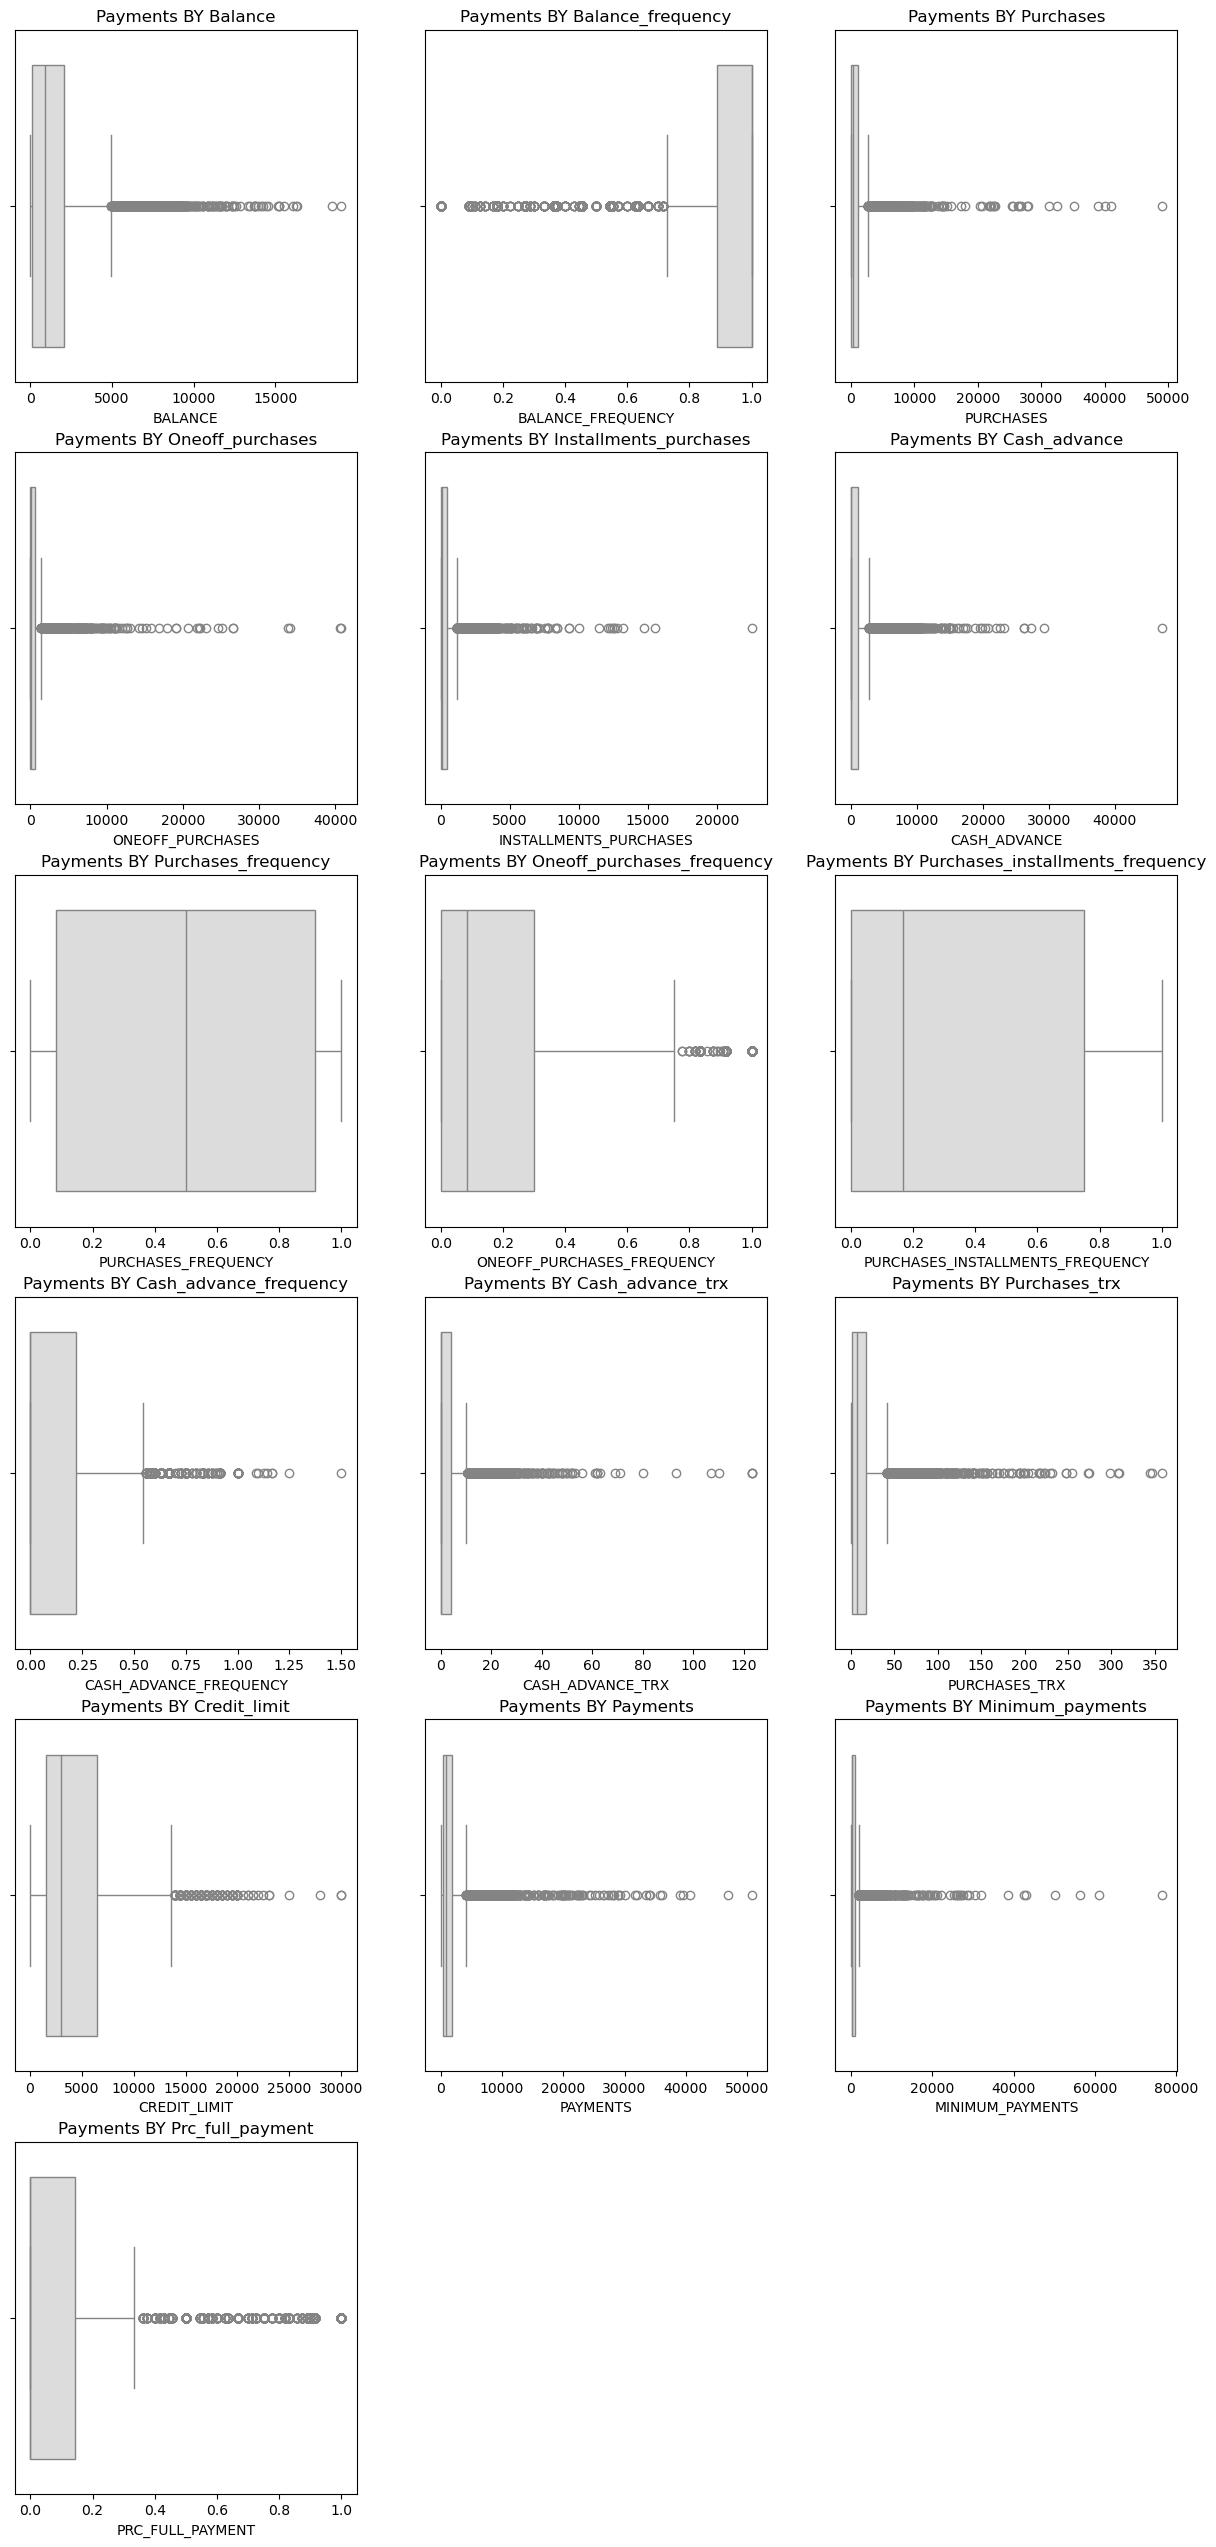

In [17]:
plt.figure(figsize=(15,32))
for col in data.columns[:-1]:
    if data[col].nunique()<=10:
        continue
    
    else:
        plt.subplot(6,3,list(data.columns).index(col)+1)    
        plt.title('Payments BY '+col.capitalize())
        sns.boxplot(data=data,x=col,orient='h',palette='coolwarm')
plt.show()       

In [19]:
for col in data.columns[:-1]:
    Q1=data[col].quantile(0.25)
    Q3=data[col].quantile(0.75)
    IQR=Q3-Q1
    lower_fence=Q1-1.5*IQR
    upper_fence=Q3+1.5*IQR
    lower_outliers=data[data[col]<lower_fence][col].values
    upper_outliers=data[data[col]>upper_fence][col].values
    data[col].replace(lower_outliers,lower_fence,inplace=True)
    data[col].replace(upper_outliers,upper_fence,inplace=True)

C:\Users\Mahmoud\AppData\Local\Temp\ipykernel_9956\1634821147.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].replace(lower_outliers,lower_fence,inplace=True)
C:\Users\Mahmoud\AppData\Local\Temp\ipykernel_9956\1634821147.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a c

C:\Users\Mahmoud\AppData\Local\Temp\ipykernel_9956\117613080.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data,x=col,orient='h',palette='coolwarm')
C:\Users\Mahmoud\AppData\Local\Temp\ipykernel_9956\117613080.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data,x=col,orient='h',palette='coolwarm')
C:\Users\Mahmoud\AppData\Local\Temp\ipykernel_9956\117613080.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data,x=col,orient='h',palette='coolwarm')
C:\Users\Mahmoud\AppData\Local\Temp\ipykernel_9956\117613080.py:9: 

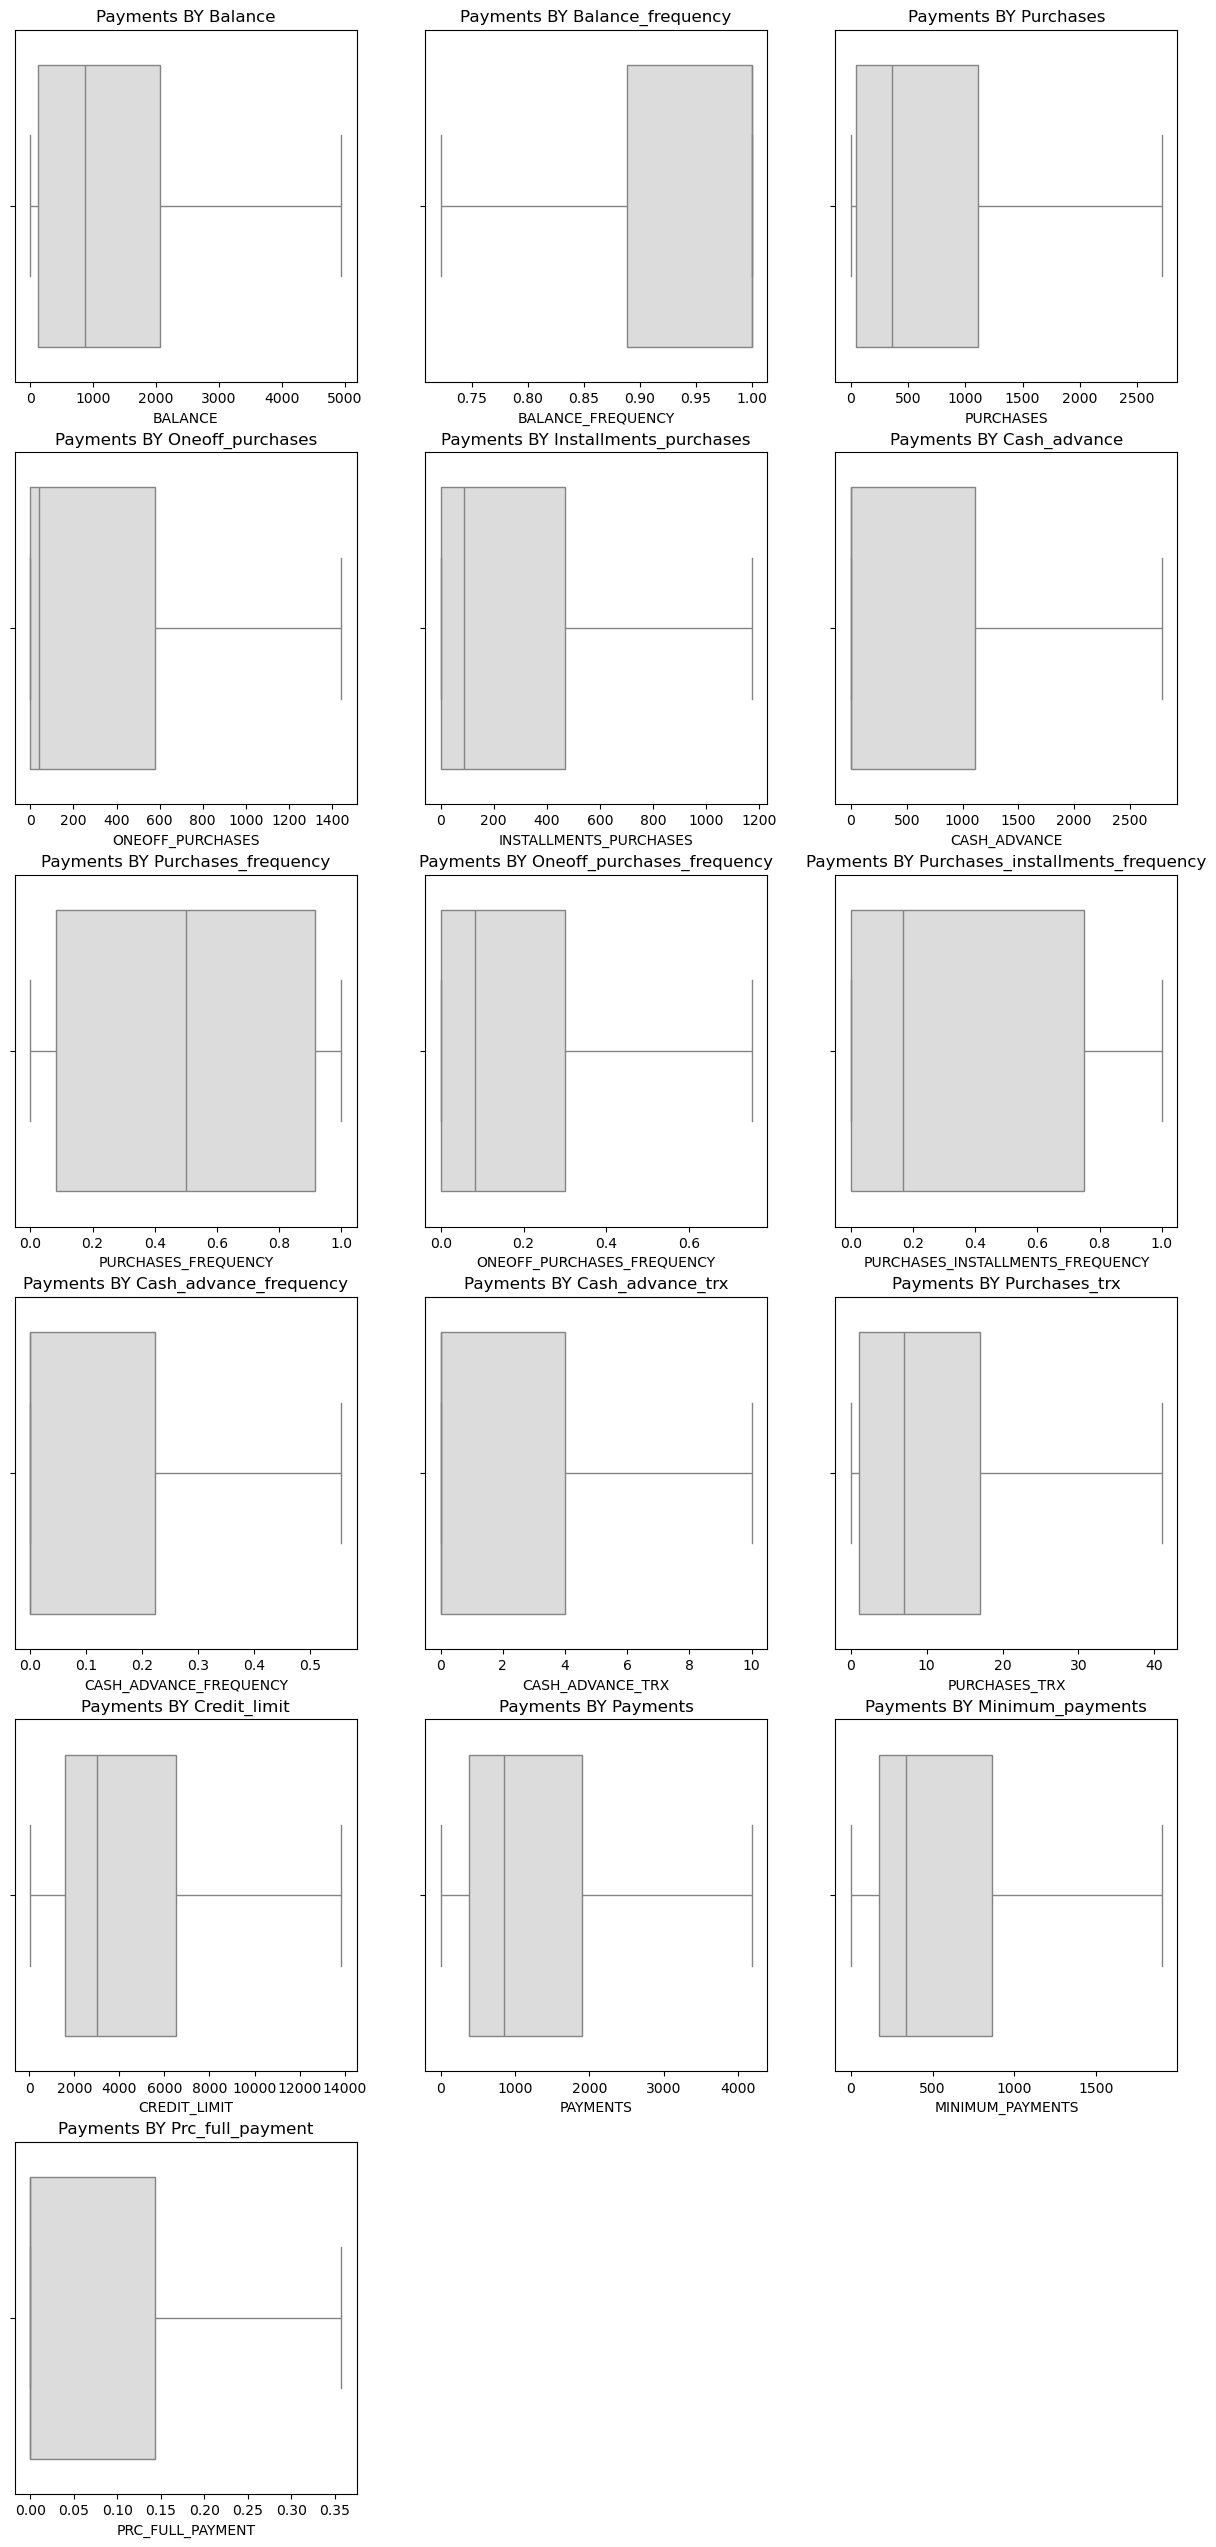

In [20]:
plt.figure(figsize=(15,32))
for col in data.columns[:-1]:
    if data[col].nunique()<=10:
        continue
    
    else:
        plt.subplot(6,3,list(data.columns).index(col)+1)    
        plt.title('Payments BY '+col.capitalize())
        sns.boxplot(data=data,x=col,orient='h',palette='coolwarm')
plt.show()  

## Data Splitting

In [21]:
X=data.iloc[:,:]

In [23]:
def scaling(data):
    scalers={}
    for col in data.columns:
        scaler=MinMaxScaler()
        data[col]=scaler.fit_transform(np.array(data[col]).reshape(-1,1))
        scalers[col]=scaler
    return data,scalers    

In [24]:
X,scalers=scaling(X)

In [26]:
def data_splitting(data):
    data_len=len(data.index)
    test_len=int(round(0.2*data_len))
    train_len=data_len-test_len
    return data.iloc[:train_len,:],data.iloc[train_len:,:]

In [27]:
x_train,x_test=data_splitting(X)

## Data Modeling and Evaluation

KMeans Model

In [48]:
KMeans_model=KMeans(n_clusters=5,random_state=42)
train_pred=KMeans_model.fit_predict(x_train)
test_pred=KMeans_model.fit_predict(x_test)

In [49]:
train_score=silhouette_score(x_train,train_pred)
test_score=silhouette_score(x_test,test_pred)

In [50]:
print("Training Score : ",round(train_score,3))
print("Testing Score  : ",round(test_score,3))

Training Score :  0.215
Testing Score  :  0.201


Agglomerative Clustering Model

In [51]:
hierarchy=AgglomerativeClustering(n_clusters=5,linkage='ward')
train_pred2=hierarchy.fit_predict(x_train)
test_pred2=hierarchy.fit_predict(x_test)

In [52]:
train_score2=silhouette_score(x_train,train_pred2)
test_score2=silhouette_score(x_test,test_pred2)

In [53]:
print("Training Score : ",round(train_score2,3))
print("Testing Score  : ",round(test_score2,3))

Training Score :  0.177
Testing Score  :  0.16


DBSCAN Model

In [87]:
dbscan=DBSCAN(eps=1.2,min_samples=5,metric="euclidean",algorithm='auto')
train_pred3=dbscan.fit_predict(x_train)
test_pred3=dbscan.fit_predict(x_test)

In [88]:
train_score3=silhouette_score(x_train,train_pred3)
test_score3=silhouette_score(x_test,test_pred3)

In [89]:
print("Training Score : ",round(train_score3,3))
print("Testing Score  : ",round(test_score3,3))

Training Score :  0.244
Testing Score  :  0.253


## Saving Models

In [92]:
pickle.dump(KMeans_model,open(r'models\KMeans_Model.pkl','wb'))
pickle.dump(hierarchy,open(r'models\Agglomerative_model.pkl','wb'))
pickle.dump(dbscan,open(r'models\DBSCAN_model.pkl','wb'))

## Loading Models

In [94]:
def load_models():
    KMeans_model=pickle.load(open(r'models\KMeans_Model.pkl','rb'))
    hierarchy=pickle.load(open(r'models\Agglomerative_model.pkl','rb'))
    dbscan=pickle.load(open(r'models\DBSCAN_model.pkl','rb'))
    return KMeans_model,hierarchy,dbscan

In [95]:
KMeans_model,hierarchy,dbscan=load_models()

## Saving Scalers

In [96]:
pickle.dump(scalers,open(r'scalers\scalers.pkl','wb'))

## Loading Scalers

In [97]:
def load_scalers():
    scalers=pickle.load(open(r'scalers\scalers.pkl','rb'))
    return scalers

In [98]:
scalers=load_scalers()